<a href="https://colab.research.google.com/github/DanieleScal99/MLPNS_DScalabrini/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl

In [2]:
X = np.array(
    [[0,0,1],
     [1,1,1],
     [1,0,1],
     [0,1,1]]
)

(-0.5, 2.5, 3.5, -0.5)

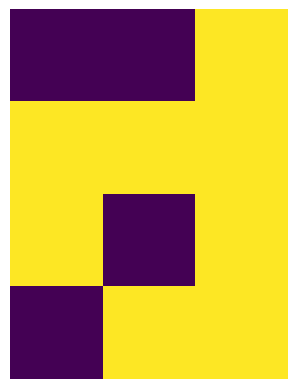

In [3]:
pl.imshow(X);
pl.axis('off')

In [4]:
y=np.array([[0,1,1,0]]).T

In [5]:
y.shape

(4, 1)

In [7]:
print('input\n',X)
print('output\n',y)

input
 [[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
output
 [[0]
 [1]
 [1]
 [0]]


# basic architecture: 1 layer 
4 osservazioni
3 neuroni
1 layer 

In [9]:
# dobbiamo costruire una activation function
def sigmoid(x): 
  return 1./(1.+np.exp(-x))

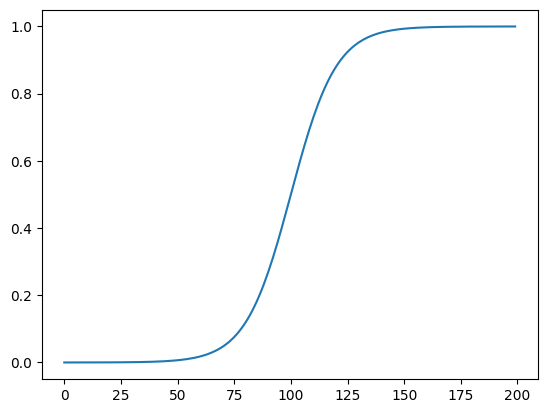

In [11]:
pl.plot(sigmoid(np.arange(-10,10,0.1)));

In [12]:
#definiamo la loss function che andremo ad utilizzare
def loss(prediction, target): 
  return target - prediction 

In [47]:
def dsigmoid(s):
  return s * (1. - s)

## Neural Network 

In [39]:
#devo fare una procedura di stochastic gradient descent 

training = 6000 #numero di epoche 

In [43]:
# creiamo il primo layer di synopses / neurons 
# i layer di neurons sono dei numpy array 
# 4 x 3 è la dimensione 
np.random.seed(302)

syn0 = 2 * np.random.random((3, 1)) - 1 #normalized 0-1
syn0.shape
print(syn0)

[[ 0.27256242]
 [ 0.65008468]
 [-0.31671053]]


In [46]:
loss_output = []

for iter in range(training): 
  inputLayer = X 

  # forward propagation 
  # linear regression 
  l1 = np.dot(inputLayer, syn0)
  #activations
  
  output = sigmoid(l1)
  #calculate error
  output_error = loss(output, y)
  loss_output.append(np.abs(output_error).sum())
  #calculate correction
  output_delta = output_error + dsigmoid(output)
  #apply correction to weights 
  syn0 += np.dot(inputLayer.T, output_delta) 
  #inserire layer tra input e output si chiama backpropagation

print('outpur after training\n', output)
print('output target\n', y)

outpur after training
 [[0.0099753 ]
 [0.9999656 ]
 [0.99997148]
 [0.00828383]]
output target
 [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'Global loss')

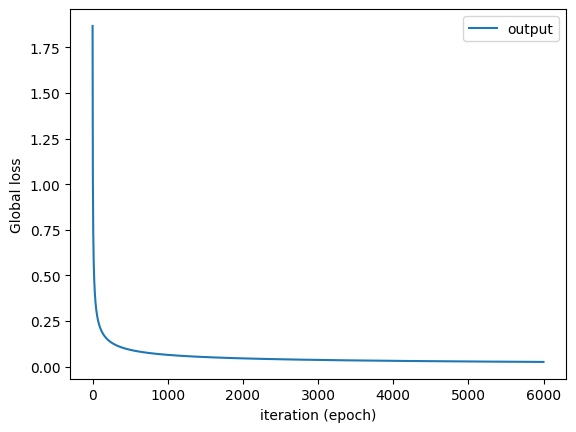

In [45]:
pl.plot(loss_output, label='output')
pl.legend()
pl.xlabel('iteration (epoch)')
pl.ylabel('Global loss')

#Doppio Layer

In [ ]:
np.random.seed(302)

syn0 = 2 * np.random.random((3, 5)) - 1 #normalized 0-1 
#syn0 è il vettore dei pesi
syn0.shape
print(syn0)

syn1=2 * np.random.random((5,1)) - 1

loss_output = []

for iter in range(training): 
  inputLayer = X 

  l1 = np.dot(inputLayer, syn0)
  hidden=sigmoid(l1)
  hidden_error = loss(hidden, y)

  l2 = np.dot(hidden, syn1)
  output = sigmoid(l2)

  outpur_error=loss(output, y)
  loss_output.append(np.abs(output_error))

  output_delta = output_error + dsigmoid(output)
  